In [1]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [2]:
model = LocalPositiveFeedbackModel(size=50)
R = np.arange(2, 0.8, -0.02)

# Load Simulation Snapshots

In [3]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/local_positive_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10 = data

# Effects of Noise

## Additive Noise

I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [4]:
model.noise = "additive"
time_steps = 1000
sigma_B = [0.01, 0.1, 0.25]

### $\sigma_B=0.01$

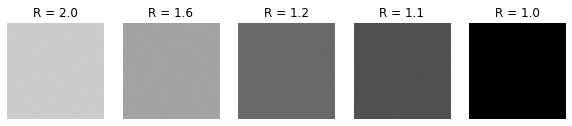

In [5]:
if not load:
    model.sigma_B = sigma_B[0]
    snapshots1 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots1, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

### $\sigma_B=0.1$

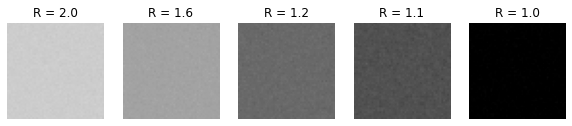

In [6]:
if not load:
    model.sigma_B = sigma_B[1]
    snapshots2 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots2, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

### $\sigma_B=0.25$

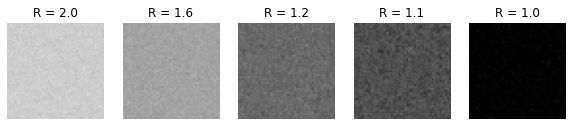

In [7]:
if not load:
    model.sigma_B = sigma_B[2]
    snapshots3 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots3, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

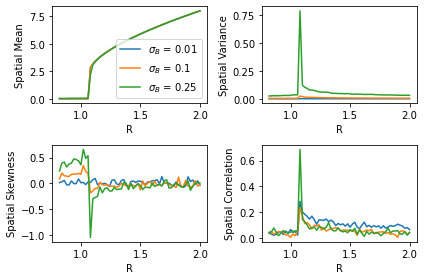

In [8]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "R", levels=sigma_B, level_name=r"$\sigma_B$")

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [9]:
model.noise = "multiplicative"
sigma_B = [0.01, 0.05, 0.1]

### $\sigma_B=0.01$

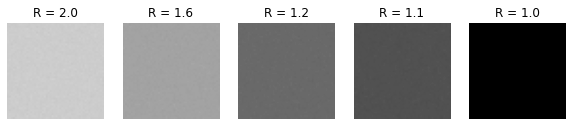

In [10]:
if not load:
    model.sigma_B = sigma_B[0]
    snapshots4 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots4, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

### $\sigma_B=0.05$

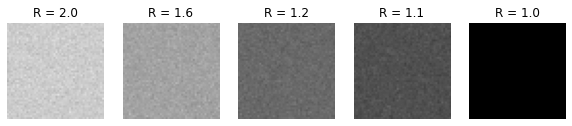

In [11]:
if not load:
    model.sigma_B = sigma_B[1]
    snapshots5 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots5, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

### $\sigma_B=0.1$

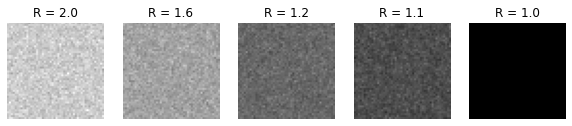

In [12]:
if not load:
    model.sigma_B = sigma_B[2]
    snapshots6 = parameter_change(model, R, "R", time_steps)
plot_snapshots(snapshots6, [2, 1.6, 1.2, 1.1, 1], "R", vmin=0, vmax=10)

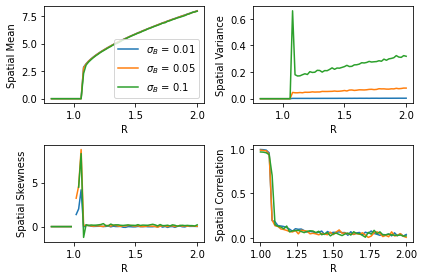

In [13]:
spatial_indicator_grid([snapshots4, snapshots5, snapshots6], "R", levels=sigma_B, level_name=r"$\sigma_B$")

## Observations

The level of noise had no effect of the spatial mean since the system is in a homogeneous state.

The early warning signals behave in a similar manner for all levels of noise very close to the critical transition.

Higher levels of noise resulted in larger spatial variance due to larger fluctuations around the equilibrium. It also lead to higher magnitudes in spatial skewness as the skew of the values become larger in either direction. Higher levels of additive noise lead to reduced spatial correlation due to larger spatial perturbations, but there appears to be no noticeable effect of higher levels of multiplicative noise.

For multiplicative noise, spatial variance decreased as rainfall decreased because vegetation biomass decreased, and the noise was state-dependent. Spatial variance only increased sharply very close to the critical transition, which may be too late to detect. Spatial skewness did not have a noticeable decrease with multiplicative noise, possibly due to smaller fluctuations at lower values. However, spatial skewness was much higher at the critical transition as it was practically impossible for the biomass to become negative from values very close to zero, unlike with additive noise. Spatial correlation also remained high after the critical transition as the vegetation has decreased to zero with no noise.

# Effect of Preventive Measures

I simulated the effect of reducing the maximum grazing rate when the rainfall falls below a certain value to see if it can prevent desertification. The maximum grazing rate cannot fall below 0.

In [14]:
model.noise = "additive"
model.sigma_B = 0.25

mu0 = 2.
dmu = [0, -0.0001, -0.001, -0.01]
mu_bounds = (0, None)

## $\frac{dR}{dt}=-0.001$

In [15]:
dR = -0.0001
time_steps = 1000

### Preventive Measures at $R=1.1$

In [16]:
R0 = 1.15

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

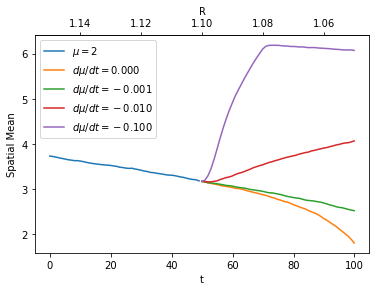

In [17]:
if not load:
    snapshots7 = preventive_measure(model, time_steps, R0, dR, mu0, dmu, "R", "mu", 1.1, b_bounds=mu_bounds)
    snapshots7 = [snapshots.iloc[::10] for snapshots in snapshots7]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots7:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$\mu=2$"] + [fr"$d\mu/dt={dmu_step/model.dt:.3f}$" for dmu_step in dmu])

### Preventive Measures at $R=1.05$

In [18]:
R0 = 1.1

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

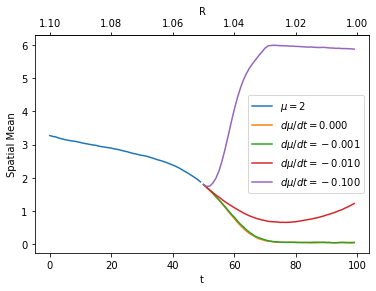

In [19]:
if not load:
    snapshots8 = preventive_measure(model, time_steps, R0, dR, mu0, dmu, "R", "mu", 1.05, b_bounds=mu_bounds)
    snapshots8 = [snapshots.iloc[::10] for snapshots in snapshots8]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots8:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$\mu=2$"] + [fr"$d\mu/dt={dmu_step/model.dt:.3f}$" for dmu_step in dmu])

## $\frac{dR}{dt}=-0.01$

In [20]:
dR = -0.001
time_steps = 100

### Preventive Measures at $R=1.1$

In [21]:
R0 = 1.15

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

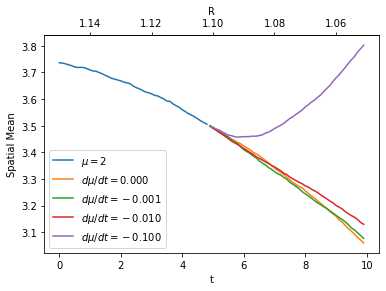

In [22]:
if not load:
    snapshots9 = preventive_measure(model, time_steps, R0, dR, mu0, dmu, "R", "mu", 1.1, b_bounds=mu_bounds)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots9:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$\mu=2$"] + [fr"$d\mu/dt={dmu_step/model.dt:.3f}$" for dmu_step in dmu])

### Preventive Measures at $R=1.05$

In [23]:
R0 = 1.1

f = lambda t : R0 + t*dR/model.dt
g = lambda R : model.dt*(R - R0)/dR

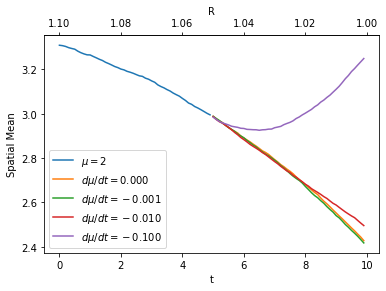

In [24]:
if not load:
    snapshots10 = preventive_measure(model, time_steps, R0, dR, mu0, dmu, "R", "mu", 1.05, b_bounds=mu_bounds)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("R")

for snapshots in snapshots10:
    plot_spatial_indicator(ax, snapshots, "mean", "t")

ax.legend([r"$\mu=2$"] + [fr"$d\mu/dt={dmu_step/model.dt:.3f}$" for dmu_step in dmu])

## Observations

When the reduction of maximum grazing rate is fast enough to overcome the increasingly harsh environment from decreasing rainfall, then the system recovers vegetation. However, if the reduction is insufficiently fast, then desertification continues.

When the decrease in rainfall is faster, then a faster reduction rate in maximum grazing rate is required for the system to recover. However, the faster decrease in rainfall also means the system does not have time to settle to equilibrium and thus desertification "lags".

In some instances, decrease in vegetation continues after preventive measures take place until the maximum grazing rate is low enough to allow recovery.

The closer to the deterministic bifurcation point the preventive measures take place, the faster the reduction in maximum grazing rate needs to be as there is less time for recovery.

# Duration of Run

I simulated the system from different initial conditions for decreasing values of $R$ towards the critical transition.

## $R=1.5$

In [25]:
model.noise = "additive"
model.sigma_B = 0.25
model.mu = 2.
time_steps = 200
initial = np.arange(1, 8)

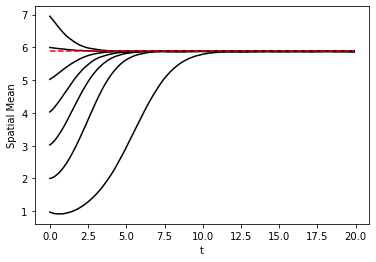

In [26]:
model.R = 1.5
plot_time_simulations(model, initial, time_steps)

## $R=1.4$

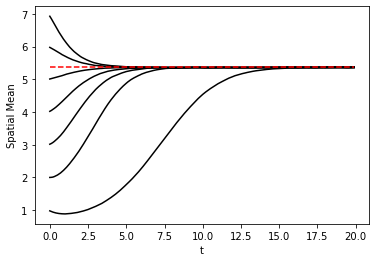

In [27]:
model.R = 1.4

plot_time_simulations(model, initial, time_steps)

## $R=1.3$

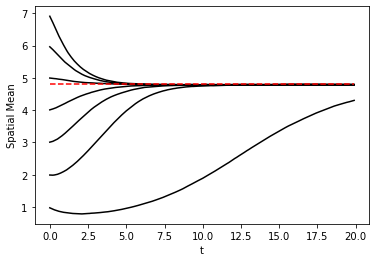

In [28]:
model.R = 1.3

plot_time_simulations(model, initial, time_steps)

## $R=1.2$

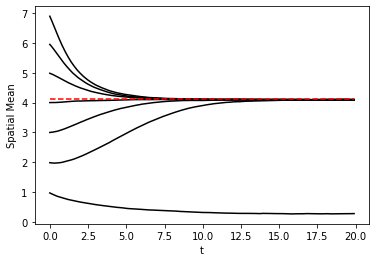

In [29]:
model.R = 1.2

plot_time_simulations(model, initial, time_steps)

## $R=1.1$

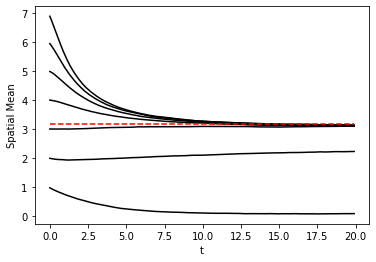

In [30]:
model.R = 1.1

plot_time_simulations(model, initial, time_steps)

Further from the critical transition, the system recovers fairly quickly and symmetrically from both directions.  As we approach the critical transition, recovery is slower and the system starts recovering slower from below than above due to the increased attraction towards the desert equilibrium. At low enough initial values, the system goes to the desert state.

# Equilibria

In [31]:
bifurcation = find_bifurcation(model, 2, 0.8, -0.1, "R", 1.e-3)
print(f"Bifurcation at R = {bifurcation:.2f}")

Bifurcation at R = 1.07


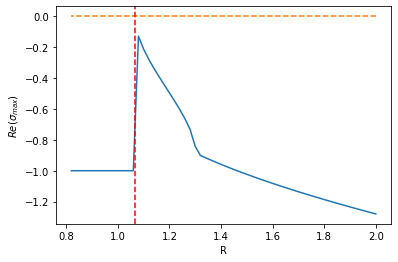

In [32]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, R, "R")
ax.axvline(bifurcation, linestyle='--', color="red")

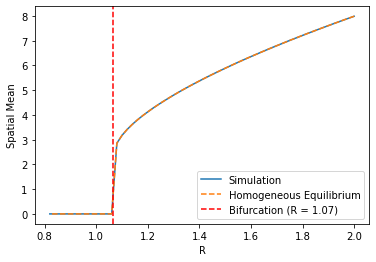

In [33]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots1, "mean", "R")
plot_equilibria(ax, model, R, "R")
ax.axvline(bifurcation, linestyle='--', color="red")
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Bifurcation (R = {bifurcation:.2f})"])

I plotted the simulation results against the homogeneous equilibrium. The simulation closely followed the homogeneous equilibrium, due to the relative homogeneous behaviour of the model.

# Save Simulation Snapshots

In [35]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8, snapshots9, snapshots10)
    save_data('Results/local_positive_model.dat', data)